In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Wealth\Downloads\accidents.csv")

In [4]:
df

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding
...,...,...,...,...,...,...,...
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving


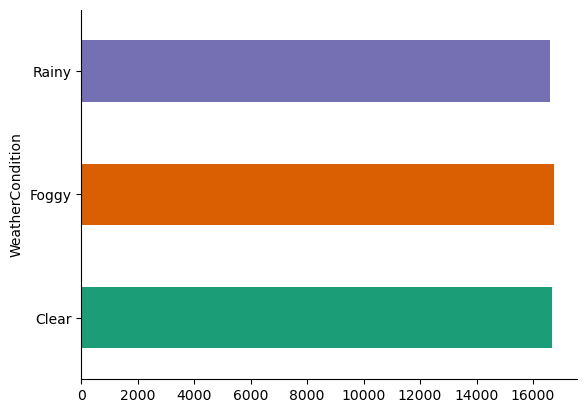

In [5]:
# @title WeatherCondition

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('WeatherCondition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [8]:
df.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [9]:
df.columns

Index(['AccidentDate', 'Timing', 'State', 'WeatherCondition', 'RoadCondition',
       'Deaths', 'Reason'],
      dtype='object')

In [10]:
df.AccidentDate.unique()

array(['04-02-2013', '23-02-2005', '08-10-2014', ..., '22-06-2013',
       '20-02-2022', '21-10-2018'], dtype=object)

In [11]:
df.Timing.unique()

array(['Morning', 'Night', 'Afternoon', 'Evening'], dtype=object)

In [12]:
df.State.unique()

array(['Alaska', 'Arizona', 'California', 'Colorado', 'Georgia',
       'Indiana', 'Louisiana', 'Nevada', 'Montana', 'New Jersey',
       'New Mexico', 'New York', 'Ohio', 'Pennsylvania', 'Texas',
       'Virginia', 'Washington', 'North Carolina', 'South Carolina',
       'Wisconsin', 'Wyoming', 'West Virginia', 'Florida', 'Vermont',
       'Michigan', 'Minnesota', 'Illinois', 'Iowa'], dtype=object)

In [13]:
df.WeatherCondition.unique()

array(['Rainy', 'Clear', 'Foggy'], dtype=object)

In [14]:
df.RoadCondition.unique()

array(['Under Construction', 'Fine', 'Rough'], dtype=object)

In [15]:
df.Deaths.unique()

array([10,  3,  6,  8,  2,  4,  0,  5,  1,  9,  7], dtype=int64)

In [16]:
df.Reason.unique()

array(['Drunk Driving', 'Weather Conditions', 'Poor Visibility',
       'Road Conditions', 'Speeding', 'Reckless Driving',
       'Distracted Driving', 'Driver Fatigue', 'Mechanical Failure'],
      dtype=object)

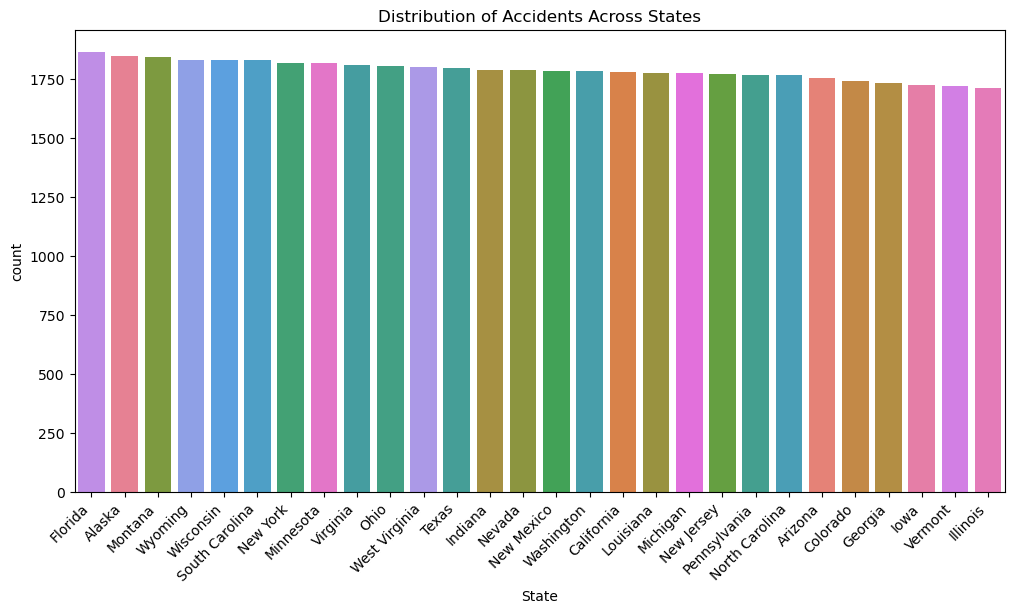

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x="State", hue="State", data=df, order=df['State'].value_counts().index, legend=False)  # Replaced palette with hue and added legend=False
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

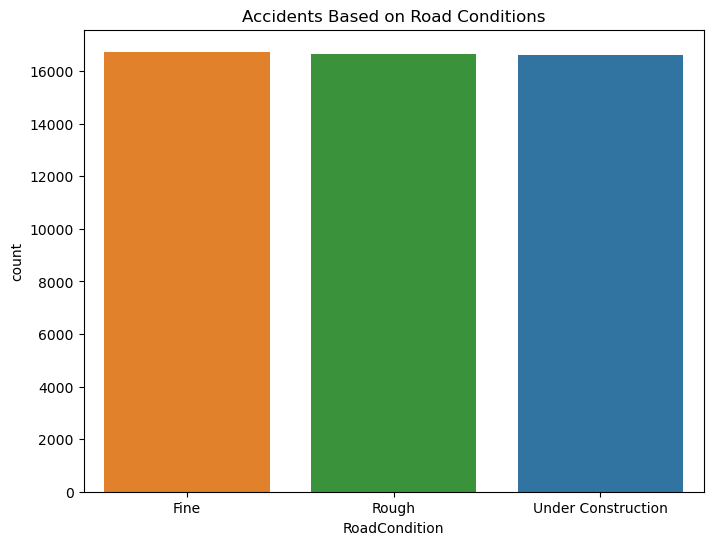

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", hue="RoadCondition", data=df, order=df['RoadCondition'].value_counts().index, legend=False)  # Replaced palette with hue and added legend=False
plt.title("Accidents Based on Road Conditions")
plt.show()

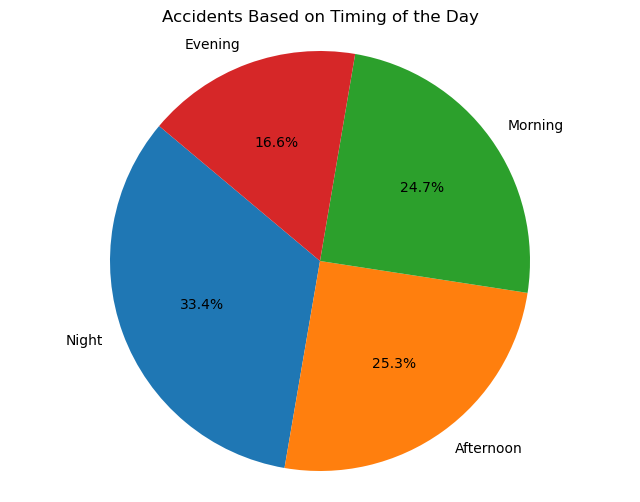

In [21]:
timing_counts = df['Timing'].value_counts()
colors = plt.cm.tab20.colors[:len(timing_counts)]

plt.figure(figsize=(8, 6))
plt.pie(timing_counts, labels=timing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Accidents Based on Timing of the Day")
plt.axis('equal')
plt.show()

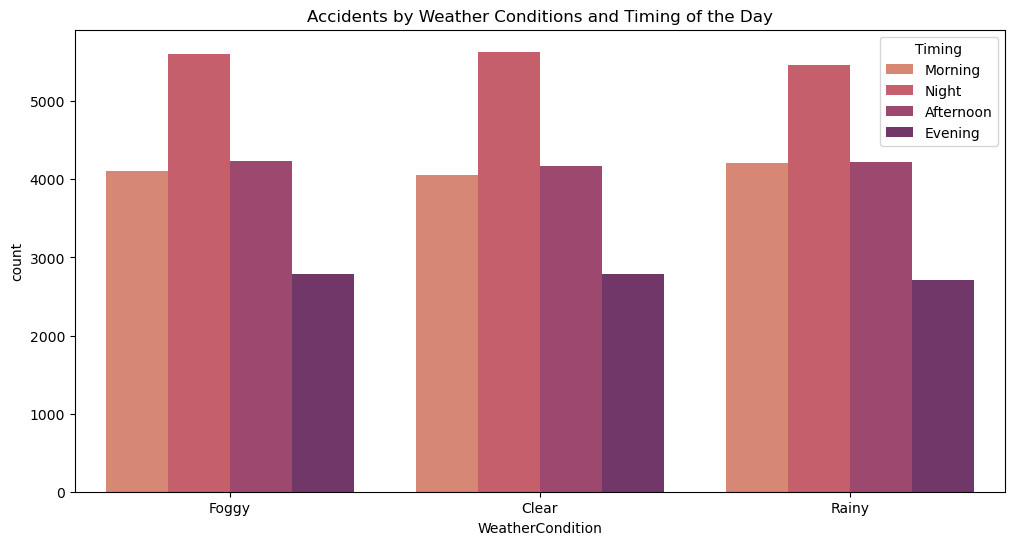

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=df, order=df['WeatherCondition'].value_counts().index,palette='flare')
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

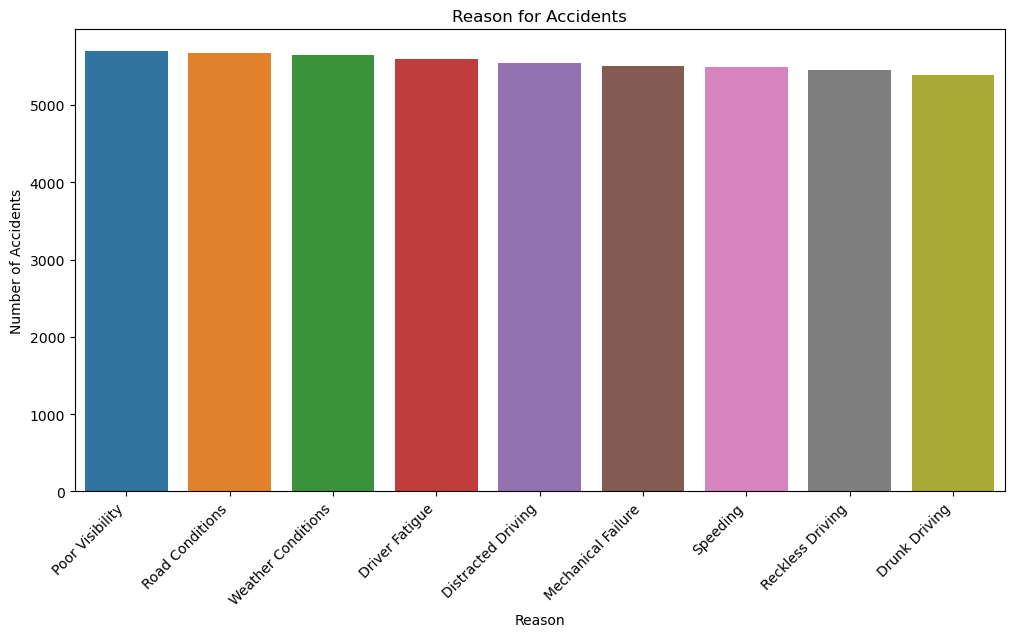

In [23]:
plt.figure(figsize=(12, 6))
reasons_accidents = df['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, hue=reasons_accidents.index, legend=False)  # Replaced palette with hue and added legend=False
plt.title("Reason for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 5000x1000 with 0 Axes>

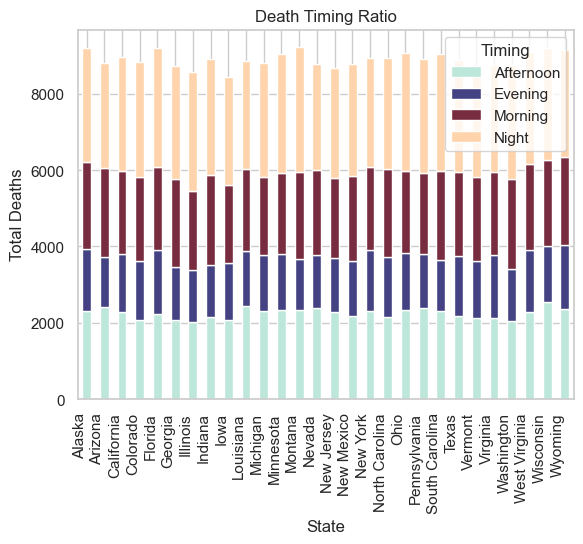

In [25]:
sns.set(style="whitegrid")

state_timingdeaths = df.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

state_timingdeaths_pivot = state_timingdeaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

plt.figure(figsize=(50, 10))
state_timingdeaths_pivot.plot(kind='bar', stacked=True, colormap="icefire")
plt.title("Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Timing")
plt.show()